# Bayesian Adaptive Threshold (BAT)

This notebook shows the steps and calculations for our Bayesian Adaptive Threshold, a more advanced way to find signals in our energy detection algorithm. Previously, the statistics threshold was a constant number, now we will be using the two equations below for the threshold. We will be calculating the final threshold for each coarse channel and for a 3-coarse channel window as well.

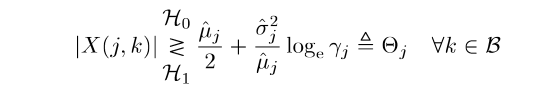

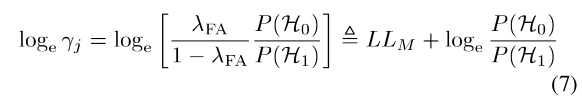

H0 (null hypothesis) the signal is not present
H1 (alternate hypothesis) the signal is present

We will be using one scale, so the subscript j is unecessary in our case.
We have also assigned $\lambda_{FA}$ to be $0.8$

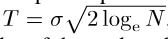

The above threshold will be used to calculate the $\frac{P(H_0)}{P(H_1)}$ ratio. $P(H_0)$ will be the number of rows whos statistic value is less than this threshold value and $P(H_1)$ will be the number of rows whos statistic value is greater than this threshold value.

**Download Observation Files**

In [1]:
!wget https://storage.googleapis.com/bl-scale/GBT_58010_49520_HIP61317_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58010_50176_HIP61317_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_63960_HIP74976_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_64290_HIP75458_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_64615_HIP75037_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_66634_HIP75499_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_66967_HIP75809_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_69259_HIP75870_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_67619_HIP75829_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_67944_HIP75407_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_67293_HIP75870_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_69642_HIP76315_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_69970_HIP75678_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_70625_HIP75764_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_71284_HIP76272_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_75986_HIP91971_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_76395_HIP91491_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_76788_HIP91973_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_77160_HIP91144_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_80772_HIP91879_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_81812_HIP92161_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_82832_HIP91462_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58077_38649_HIP56157_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58077_40312_HIP55750_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58077_49881_HIP64266_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58077_50244_HIP66675_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58077_51229_HIP66293_fine/all_info_df.pkl
!wget https://storage.googleapis.com/bl-scale/GBT_58064_82153_HIP91410_fine/all_info_df.pkl


--2020-07-31 19:18:40--  https://storage.googleapis.com/bl-scale/GBT_58010_49520_HIP61317_fine/all_info_df.pkl
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80731397 (77M) [application/octet-stream]
Saving to: ‘all_info_df.pkl’

all_info_df.pkl     100%[===================>]  76.99M  76.7MB/s    in 1.0s    

2020-07-31 19:18:41 (76.7 MB/s) - ‘all_info_df.pkl’ saved [80731397/80731397]

--2020-07-31 19:18:43--  https://storage.googleapis.com/bl-scale/GBT_58010_50176_HIP61317_fine/all_info_df.pkl
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80731397 (77M) [a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Read in the dataframes**

In [2]:
HIP61317 = pd.read_pickle('/content/all_info_df.pkl')
HIP61317_1 = pd.read_pickle("/content/all_info_df.pkl.1")
HIP74976 = pd.read_pickle("/content/all_info_df.pkl.2")
HIP75458 = pd.read_pickle("/content/all_info_df.pkl.3")
HIP75037 = pd.read_pickle("/content/all_info_df.pkl.4")
HIP75499 = pd.read_pickle("/content/all_info_df.pkl.5")
HIP75809 = pd.read_pickle("/content/all_info_df.pkl.6")

In [5]:
HIP75870 = pd.read_pickle("/content/all_info_df.pkl.7")
HIP75829 = pd.read_pickle("/content/all_info_df.pkl.8")
HIP75407 = pd.read_pickle("/content/all_info_df.pkl.9")
HIP75870_1 = pd.read_pickle("/content/all_info_df.pkl.11")
HIP76315 = pd.read_pickle("/content/all_info_df.pkl.10")
HIP75678 = pd.read_pickle("/content/all_info_df.pkl.12")
HIP75764 = pd.read_pickle("/content/all_info_df.pkl.13")

In [6]:
HIP76272 = pd.read_pickle("/content/all_info_df.pkl.14")
HIP91971 = pd.read_pickle("/content/all_info_df.pkl.15")
HIP91491 = pd.read_pickle("/content/all_info_df.pkl.16")
HIP91973 = pd.read_pickle("/content/all_info_df.pkl.17")
HIP91144 = pd.read_pickle("/content/all_info_df.pkl.18")
HIP91879 = pd.read_pickle("/content/all_info_df.pkl.19")
HIP92161 = pd.read_pickle("/content/all_info_df.pkl.20")

In [7]:
HIP91462 = pd.read_pickle("/content/all_info_df.pkl.21")
HIP56157 = pd.read_pickle("/content/all_info_df.pkl.22")
HIP55750 = pd.read_pickle("/content/all_info_df.pkl.23")
HIP64266 = pd.read_pickle("/content/all_info_df.pkl.24")
HIP66675 = pd.read_pickle("/content/all_info_df.pkl.25")
HIP66293 = pd.read_pickle("/content/all_info_df.pkl.26")
HIP91410 = pd.read_pickle("/content/all_info_df.pkl.27")

In [8]:
all = pd.concat([HIP61317, HIP61317_1, HIP74976, HIP75458, HIP75037, HIP75499, HIP75809, HIP75870, HIP75829, HIP75407, HIP75870_1
                 ,HIP76315, HIP75678, HIP75764, HIP76272, HIP91971, HIP91491, HIP91973, HIP91144, HIP91879, HIP92161, HIP91462, HIP56157, HIP55750,
                 HIP64266, HIP66675, HIP66293, HIP91410])
all

,index,statistic,pvalue,freqs
0,0,2157.168802,0.000000e+00,1926.269531
1,128,2092.805679,0.000000e+00,1926.269174
2,256,2196.136264,0.000000e+00,1926.268816
3,384,2222.197611,0.000000e+00,1926.268458
4,512,2203.807735,0.000000e+00,1926.268101
...,...,...,...,...
2522823,322960640,59.097975,1.469054e-13,1023.927927
2522824,322960768,55.481320,8.961577e-13,1023.927569
2522825,322960896,41.232861,1.112751e-09,1023.927212
2522826,322961024,49.368279,1.904647e-11,1023.926854


In [9]:
# add in coarse channels
all["coarse_channel"] = (all["index"])//(2**20)
all

,index,statistic,pvalue,freqs,coarse_channel
0,0,2157.168802,0.000000e+00,1926.269531,0
1,128,2092.805679,0.000000e+00,1926.269174,0
2,256,2196.136264,0.000000e+00,1926.268816,0
3,384,2222.197611,0.000000e+00,1926.268458,0
4,512,2203.807735,0.000000e+00,1926.268101,0
...,...,...,...,...,...
2522823,322960640,59.097975,1.469054e-13,1023.927927,307
2522824,322960768,55.481320,8.961577e-13,1023.927569,307
2522825,322960896,41.232861,1.112751e-09,1023.927212,307
2522826,322961024,49.368279,1.904647e-11,1023.926854,307


**Statistic Distribution of Middle 50%**

In [10]:
sampled_all = all.sample(n=10000)
sampled_all

,index,statistic,pvalue,freqs,coarse_channel
770285,98608512,16.152294,3.108665e-04,1650.760531,94
2059065,263592448,19.117397,7.058460e-05,1189.800739,251
312963,40064128,22.177268,1.528507e-05,1814.331651,38
585977,75014144,25.716308,2.604802e-06,1716.682434,71
1069355,136894080,27.310349,1.173906e-06,1543.791890,130
...,...,...,...,...,...
485987,62213888,32.566422,8.477957e-08,1752.445936,59
668440,85570688,40.926179,1.297159e-09,1687.187791,81
1103157,141221248,1445.097798,0.000000e+00,1531.701922,134
1742740,223097856,936.800183,3.770725e-204,1302.941322,212


In [11]:
sampled_all["statistic"].describe()

count    10000.000000
mean       212.029201
std        733.023406
min          2.747819
25%         24.559315
50%         34.142912
75%         50.017649
max      11046.945732
Name: statistic, dtype: float64

In [12]:
sample_mid50 = sampled_all[(sampled_all["statistic"] >= 24.559315) & (sampled_all["statistic"] <=50.017649)]
sample_mid50

,index,statistic,pvalue,freqs,coarse_channel
585977,75014144,25.716308,2.604802e-06,1716.682434,71
1069355,136894080,27.310349,1.173906e-06,1543.791890,130
1433474,183507072,27.383127,1.131956e-06,1413.556695,175
199715,25566592,37.307230,7.922055e-09,1854.837298,24
1695412,217039104,39.168605,3.123529e-09,1319.869280,206
...,...,...,...,...,...
496910,63612160,30.862972,1.986968e-07,1748.539209,60
399180,51101184,27.881858,8.821276e-07,1783.494473,48
485987,62213888,32.566422,8.477957e-08,1752.445936,59
668440,85570688,40.926179,1.297159e-09,1687.187791,81


Text(0.5, 1.0, 'Statistics Distribution')

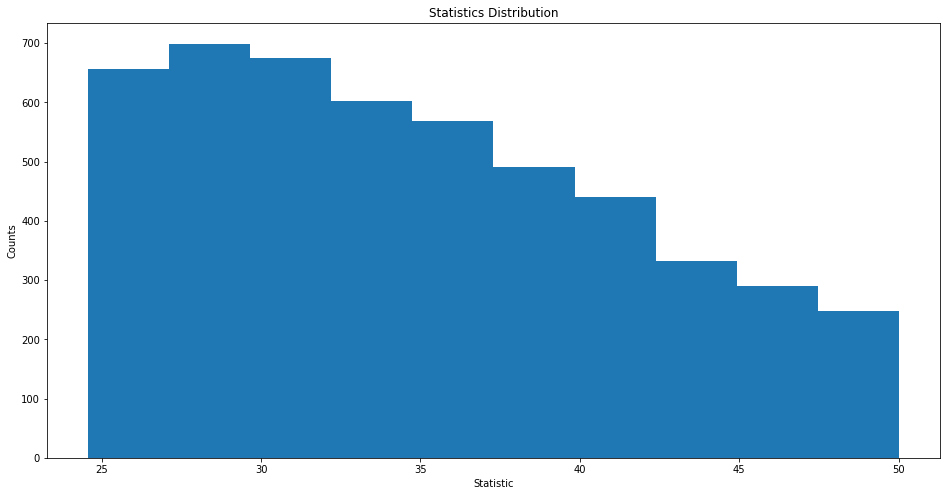

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.hist(sample_mid50["statistic"])
plt.ylabel("Counts")
plt.xlabel("Statistic")
plt.title("Statistics Distribution")


**BAT Threshold using 3-Coarse-Channel Window**

In [28]:
# finding the median and median absolute deviation of the statistics column per 3-coarse channel window
# i.e estimates for coarse channel 3 is by combining 'statistics' column of coarse channel 2,3,4
three_channel_medians = []
three_channel_mads = []
for i in range(308):
  if i == 0:
    temp = all[(all["coarse_channel"] == 0) | (all["coarse_channel"] == 1) | (all["coarse_channel"] == 2)]
    three_channel_medians += [np.median(temp["statistic"])]
    three_channel_mads += [temp.mad(0)["statistic"]]
  elif i == 307:
    temp = all[(all["coarse_channel"] == 307) | (all["coarse_channel"] == 306) | (all["coarse_channel"] == 305)]
    three_channel_medians += [np.median(temp["statistic"])]
    three_channel_mads += [temp.mad(0)["statistic"]]
  else:
    temp = all[(all["coarse_channel"] == i-1) | (all["coarse_channel"] == i) | (all["coarse_channel"] == i+1)]
    three_channel_medians += [np.median(temp["statistic"])]
    three_channel_mads += [temp.mad(0)["statistic"]]

In [ ]:
# h0_h1 = np.array([])
# for i in range(308):
#   temp = all[all["coarse_channel"] == i]
#   temp_rows = temp.shape[0]
#   numh0 = temp[temp["statistic"] < channel_thresholds[i]].shape[0]
#   #numh1 = temp[temp["statistic"] >= channel_thresholds[i]].shape[0]
#   p_h0 = numh0/temp_rows
#   h0_h1 = np.append(h0_h1, p_h0/(1-p_h0))
# np.save("ph0_ph1.npy", h0_h1)

In [29]:
# the P(H0)/P(H1) value
h0_h1 = np.load("ph0_ph1.npy")

In [34]:
three_channel_final_thresholds = []
for i in range(308):
  temp = all[all["coarse_channel"] == i]
  three_channel_final_thresholds += [(three_channel_medians[i]/2) + ((three_channel_mads[i]**2)/three_channel_medians[i])*np.log((0.8/0.2)*h0_h1[i])]


In [39]:
sample_10000 = all.sample(n=10000)
sample_10000

,index,statistic,pvalue,freqs,coarse_channel
867390,111039360,29.487015,3.953447e-07,1616.029143,105
1722188,220466944,77.145136,1.770706e-17,1310.292006,210
233464,29886976,18.501610,9.603432e-05,1842.766285,28
774895,99198592,13.844376,9.856709e-04,1649.111867,94
162409,20790784,19.273751,6.527668e-05,1868.180752,19
...,...,...,...,...,...
1255883,160772608,36.472754,1.202381e-08,1477.076054,153
6475,828800,2025.826816,0.000000e+00,1923.953891,0
746019,95502080,52.605792,3.773960e-12,1659.439802,91
2480780,317578496,25.549333,2.831607e-06,1038.965464,302


In [40]:
# creates the array to be added as a column to the sample
three_final_threshold_column = []
for i in range(sample_10000.shape[0]):
  three_final_threshold_column += [three_channel_final_thresholds[sample_10000["coarse_channel"].iloc[i]]]

In [41]:
sample_10000["three_final_threshold"] = three_final_threshold_column
sample_10000

,index,statistic,pvalue,freqs,coarse_channel,three_final_threshold
867390,111039360,29.487015,3.953447e-07,1616.029143,105,31216.029902
1722188,220466944,77.145136,1.770706e-17,1310.292006,210,27129.379536
233464,29886976,18.501610,9.603432e-05,1842.766285,28,32.687244
774895,99198592,13.844376,9.856709e-04,1649.111867,94,44.369179
162409,20790784,19.273751,6.527668e-05,1868.180752,19,32.977823
...,...,...,...,...,...,...
1255883,160772608,36.472754,1.202381e-08,1477.076054,153,39.648164
6475,828800,2025.826816,0.000000e+00,1923.953891,0,62491.725425
746019,95502080,52.605792,3.773960e-12,1659.439802,91,27.395793
2480780,317578496,25.549333,2.831607e-06,1038.965464,302,4485.579595


In [42]:
# find the samples whos s-value is greater than the 3-coarse channel threshold
sample_10000_hits = sample_10000[sample_10000["statistic"] > sample_10000["three_final_threshold"]]
sample_10000_hits

,index,statistic,pvalue,freqs,coarse_channel,three_final_threshold
1409180,180397056,169.720422,1.398552e-37,1422.245979,172,57.011108
471103,60308480,36.420460,1.234234e-08,1757.769585,57,28.791617
367625,47061632,45.831582,1.116345e-10,1794.780850,44,28.617731
491315,62895872,46.888027,6.582552e-11,1750.540495,59,34.467865
471970,60419456,49.070085,2.210886e-11,1757.459521,57,28.791617
...,...,...,...,...,...,...
1568005,200729088,42.739404,5.239096e-10,1365.438938,191,35.775703
1425820,182527232,53.931628,1.944893e-12,1416.294336,174,40.933505
796134,101917568,56.077518,6.651532e-13,1641.515136,97,29.696513
1498631,191848064,163.288436,3.486315e-36,1390.252233,182,48.345212


Text(0.5, 1.0, 'Frequency Distribution (Sample Where Threshold Passed Using Three-Coarse-Channels)')

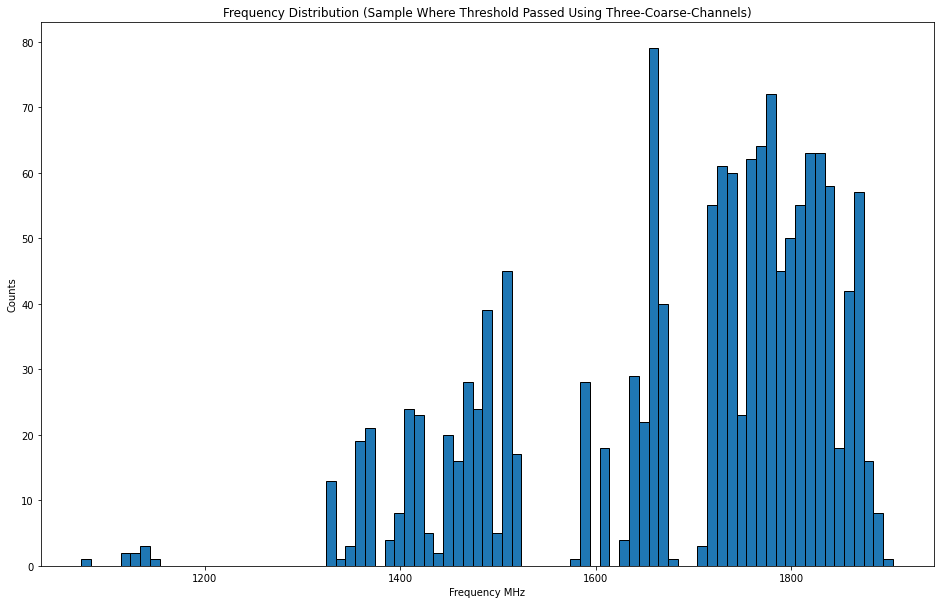

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

plt.hist(sample_10000_hits["freqs"], bins=np.arange(np.min(sample_10000_hits["freqs"]), np.max(sample_10000_hits["freqs"]), 10), edgecolor="black")
#plt.xticks(ticks=np.arange(np.min(sample_10000_hits["freqs"]), np.max(sample_10000_hits["freqs"]), 10), rotation=90)
plt.rc('xtick', labelsize=10)
plt.ylabel("Counts")
plt.xlabel("Frequency MHz")
plt.title("Frequency Distribution (Sample Where Threshold Passed Using Three-Coarse-Channels)")

Text(0, 0.5, 'Statistic')

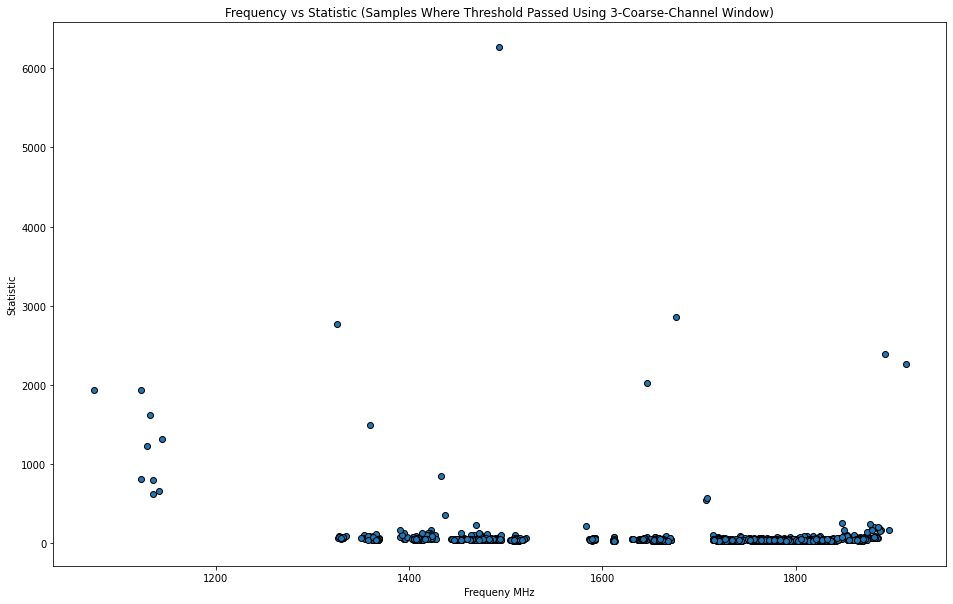

In [46]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000_hits["freqs"], y=sample_10000_hits["statistic"], edgecolors="black")
plt.title("Frequency vs Statistic (Samples Where Threshold Passed Using 3-Coarse-Channel Window)")
plt.xlabel("Frequeny MHz")
plt.ylabel("Statistic")

Text(0, 0.5, 'Final Threshold Value')

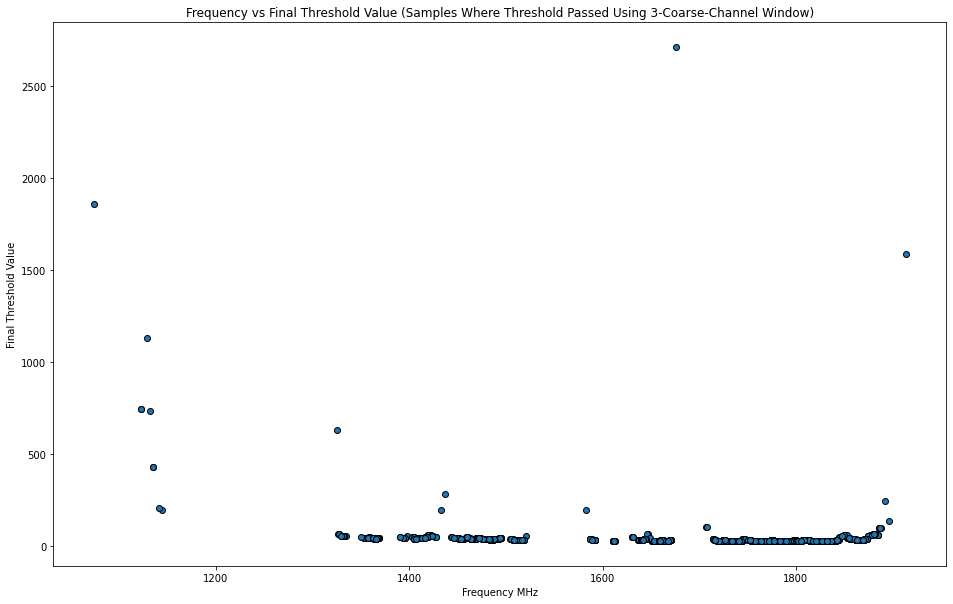

In [48]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000_hits["freqs"], y=sample_10000_hits["three_final_threshold"], edgecolors="black")
plt.title("Frequency vs Final Threshold Value (Samples Where Threshold Passed Using 3-Coarse-Channel Window)")
plt.xlabel("Frequency MHz")
plt.ylabel("Final Threshold Value")

Text(0, 0.5, 'Final Threshold Value')

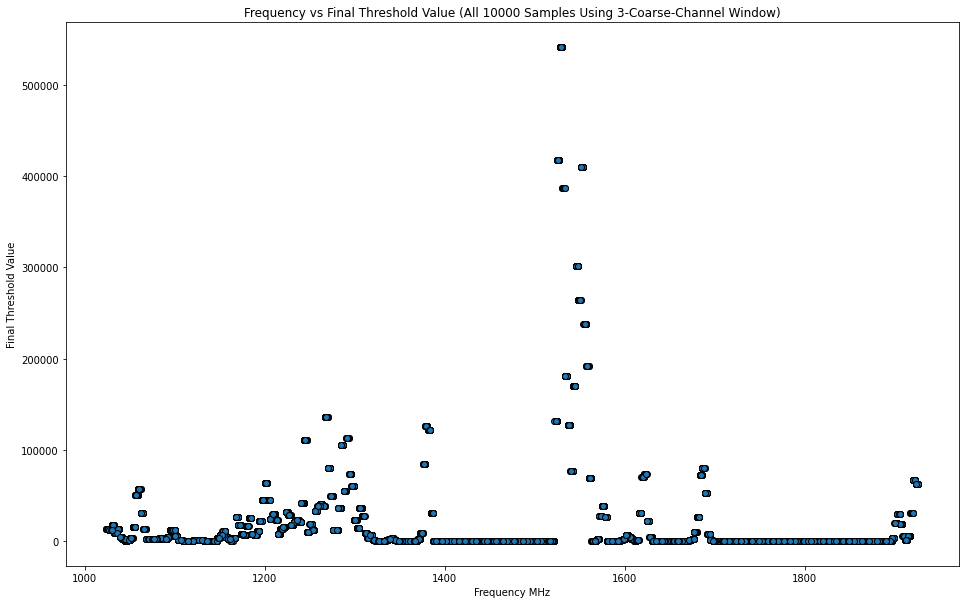

In [49]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000["freqs"], y=sample_10000["three_final_threshold"], edgecolors="black")
plt.title("Frequency vs Final Threshold Value (All 10000 Samples Using 3-Coarse-Channel Window)")
plt.xlabel("Frequency MHz")
plt.ylabel("Final Threshold Value")

**Threshold for Single Coarse Channels (Not Final Threshold)**

In [33]:
# get the list of statistic median and mad values per coarse channel
channel_median = []
channel_mad = []
for i in range(308):
  temp = all[all["coarse_channel"] == i]
  channel_median += [np.median(temp["statistic"])]
  channel_mad += [temp.mad(0)["statistic"]]

In [35]:
# get the list of threshold values per coarse channel
channel_thresholds = []
for i in range(308):
  temp = all[all["coarse_channel"] == i]
  channel_thresholds += [channel_mad[i]*np.sqrt(2*np.log(temp.shape[0]))]

In [107]:
# channel threshold array to be added as a column to the sample
threshold_column = []
for i in range(sampled_all.shape[0]):
  threshold_column += [channel_thresholds[sampled_all["coarse_channel"].iloc[i]]]

In [102]:
sampled_all["threshold"] = threshold_column
sampled_all

,index,statistic,pvalue,freqs,coarse_channel,threshold
1800633,230509056,410.798128,6.256334e-90,1282.234669,219,3952.933630
2035625,260591744,29.217769,4.523161e-07,1198.184609,248,3252.677224
852855,109178752,1309.895990,3.628272e-285,1621.227622,104,5543.738860
697351,89271808,17.869222,1.317492e-04,1676.846981,85,1061.013566
2338705,299390720,54.792396,1.264685e-12,1089.781523,285,146.460824
...,...,...,...,...,...,...
1627698,208370688,39.685961,2.411587e-09,1344.088554,198,628.709762
478309,61230976,60.340493,7.892753e-14,1755.192161,58,48.560991
1000853,128124800,18.258920,1.084241e-04,1568.292975,122,65.650442
1323109,169378560,18.283393,1.071055e-04,1453.031301,161,61.386250


Text(0, 0.5, 'Threshold Value')

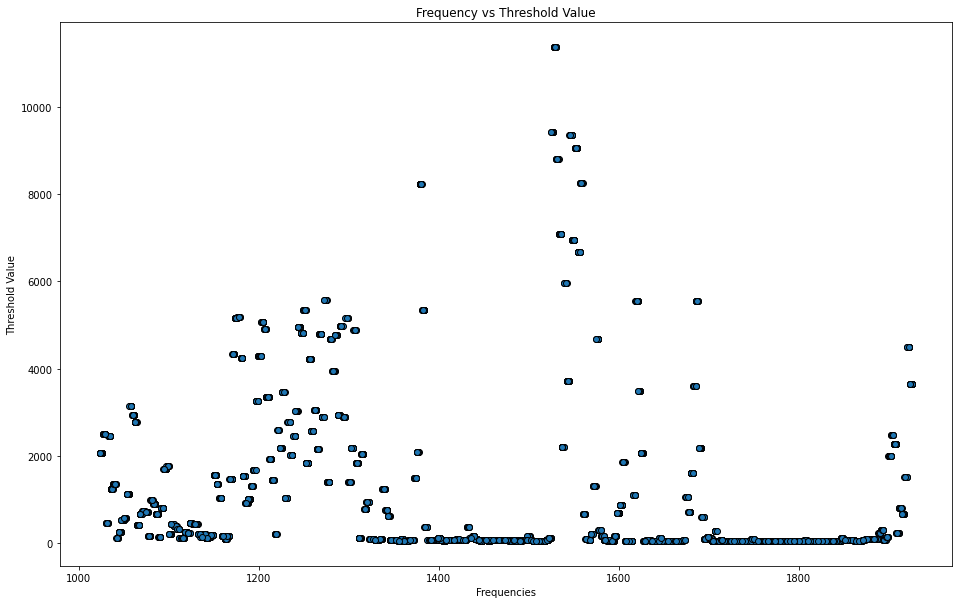

In [104]:
plt.figure(figsize=(16,10))

plt.scatter(x=sampled_all["freqs"], y=sampled_all["threshold"], edgecolors="black")
plt.title("Frequency vs Threshold Value")
plt.xlabel("Frequencies")
plt.ylabel("Threshold Value")

**Final Threshold for Single Coarse Channel**

In [110]:
# find the final channel threshold per coarse channel
channel_final_thresholds = []
for i in range(308):
  temp = all[all["coarse_channel"] == i]
  channel_final_thresholds += [(channel_median[i]/2) + ((channel_mad[i]**2)/channel_median[i])*np.log((0.8/0.2)*h0_h1[i])]

In [116]:
sample_10000 = all.sample(n=10000)
sample_10000

,index,statistic,pvalue,freqs,coarse_channel
2149056,275112704,41.612942,9.201621e-10,1157.613516,262
1248235,159793536,8.292717,1.582193e-02,1479.811549,152
2360474,302177536,10.917990,4.257832e-03,1081.995249,288
401136,51351552,70.818131,4.188305e-16,1782.794952,48
143774,18405248,60.620772,6.860671e-14,1874.845862,17
...,...,...,...,...,...
680518,87116928,1421.910809,1.721833e-309,1682.867646,83
1968136,251952128,40.944623,1.285251e-09,1222.323418,240
2093416,267989888,200.137955,3.472124e-44,1177.514434,255
2303940,294940288,18.354165,1.033817e-04,1102.215886,281


In [120]:
# final threshold array to be added as a column to sample
final_threshold_column = []
for i in range(sample_10000.shape[0]):
  final_threshold_column += [channel_final_thresholds[sample_10000["coarse_channel"].iloc[i]]]

In [121]:
sample_10000["final_threshold"] = final_threshold_column
sample_10000

,index,statistic,pvalue,freqs,coarse_channel,final_threshold
2149056,275112704,41.612942,9.201621e-10,1157.613516,262,6130.254174
1248235,159793536,8.292717,1.582193e-02,1479.811549,152,31.627390
2360474,302177536,10.917990,4.257832e-03,1081.995249,288,4902.999385
401136,51351552,70.818131,4.188305e-16,1782.794952,48,25.965499
143774,18405248,60.620772,6.860671e-14,1874.845862,17,66.533045
...,...,...,...,...,...,...
680518,87116928,1421.910809,1.721833e-309,1682.867646,83,16605.977667
1968136,251952128,40.944623,1.285251e-09,1222.323418,240,32630.372429
2093416,267989888,200.137955,3.472124e-44,1177.514434,255,6454.158495
2303940,294940288,18.354165,1.033817e-04,1102.215886,281,370.261719


In [125]:
# samples whos s-value is greater than the final threshold per coarse channel
sample_10000_hits = sample_10000[sample_10000["statistic"] > sample_10000["final_threshold"]]
sample_10000_hits

,index,statistic,pvalue,freqs,coarse_channel,final_threshold
401136,51351552,70.818131,4.188305e-16,1782.794952,48,25.965499
830699,106342400,50.559600,1.049838e-11,1629.152298,101,36.065679
821153,105120384,61.783387,3.836259e-14,1632.566571,100,46.979842
1216574,155740416,42.853281,4.949124e-10,1491.135836,148,32.867833
880397,112704512,36.319245,1.298303e-08,1611.376762,107,26.395985
...,...,...,...,...,...,...
534337,68403456,28.290757,7.190186e-07,1735.152483,65,26.439894
1603032,205213056,80.922664,2.678347e-18,1352.910876,195,46.421436
1162928,148872832,51.963361,5.203547e-12,1510.323644,141,31.077676
1293894,165638528,49.396909,1.877576e-11,1463.480830,157,36.513992


Text(0.5, 1.0, 'Frequency Distribution (Sample Where Threshold Passed)')

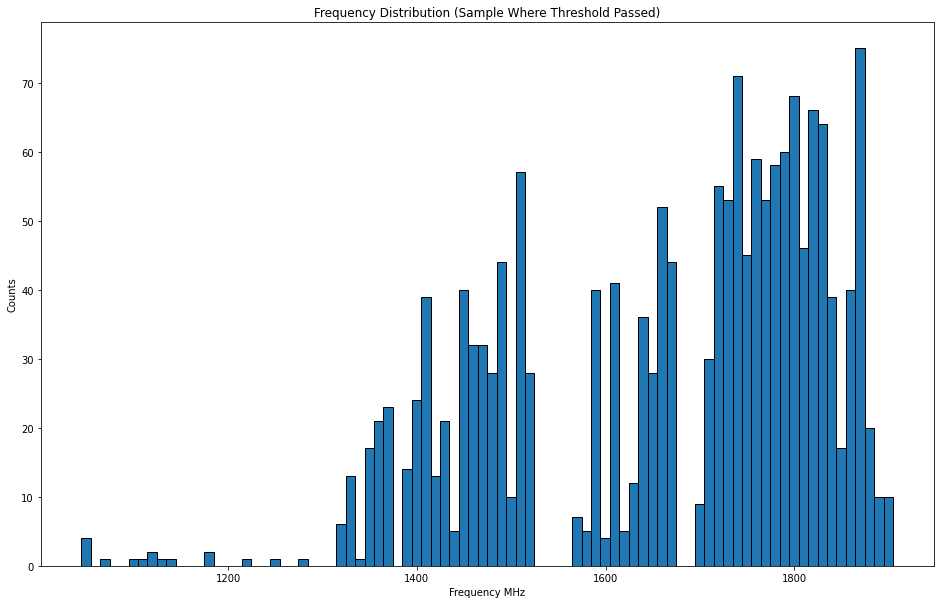

In [188]:
plt.figure(figsize=(16,10))

plt.hist(sample_10000_hits["freqs"], bins=np.arange(np.min(sample_10000_hits["freqs"]), np.max(sample_10000_hits["freqs"]), 10), edgecolor="black")
#plt.xticks(ticks=np.arange(np.min(sample_10000_hits["freqs"]), np.max(sample_10000_hits["freqs"]), 10), rotation=90)
plt.rc('xtick', labelsize=10)
plt.ylabel("Counts")
plt.xlabel("Frequency MHz")
plt.title("Frequency Distribution (Sample Where Threshold Passed)")

Text(0.5, 1.0, 'Frequency Distribution (all 10000 samples)')

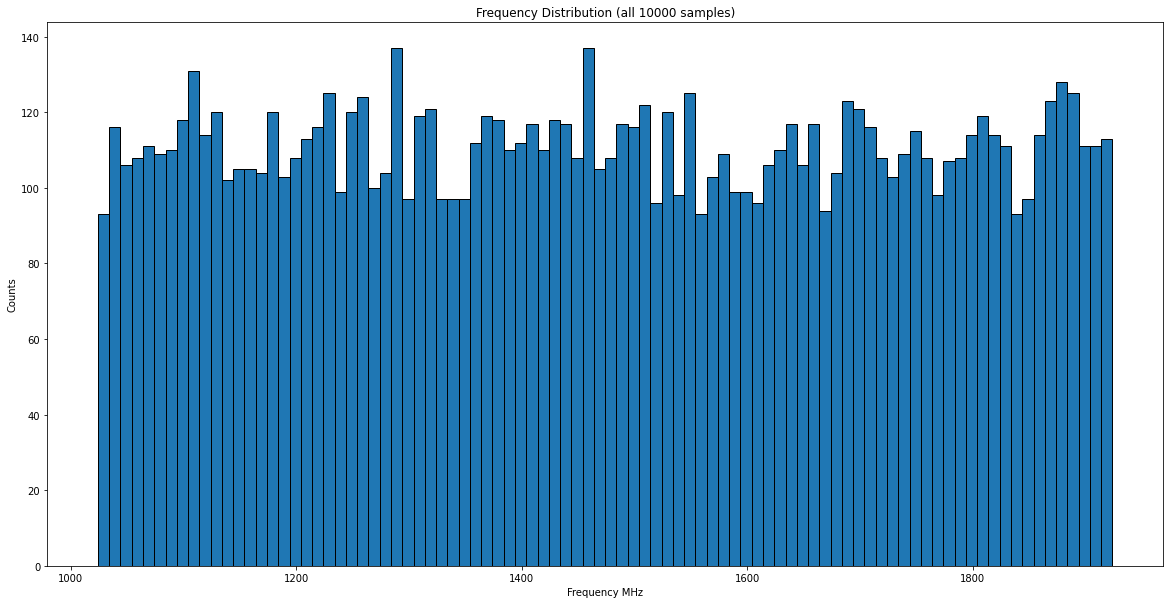

In [192]:
plt.figure(figsize=(20,10))
plt.hist(sample_10000["freqs"], bins=np.arange(np.min(sample_10000["freqs"]), np.max(sample_10000["freqs"]), 10), edgecolor="black")
#plt.xticks(ticks=np.arange(np.min(sample_10000["freqs"]), np.max(sample_10000["freqs"]), 10), rotation=90)
plt.ylabel("Counts")
plt.xlabel("Frequency MHz")
plt.title("Frequency Distribution (all 10000 samples)")


Text(0, 0.5, 'Statistic')

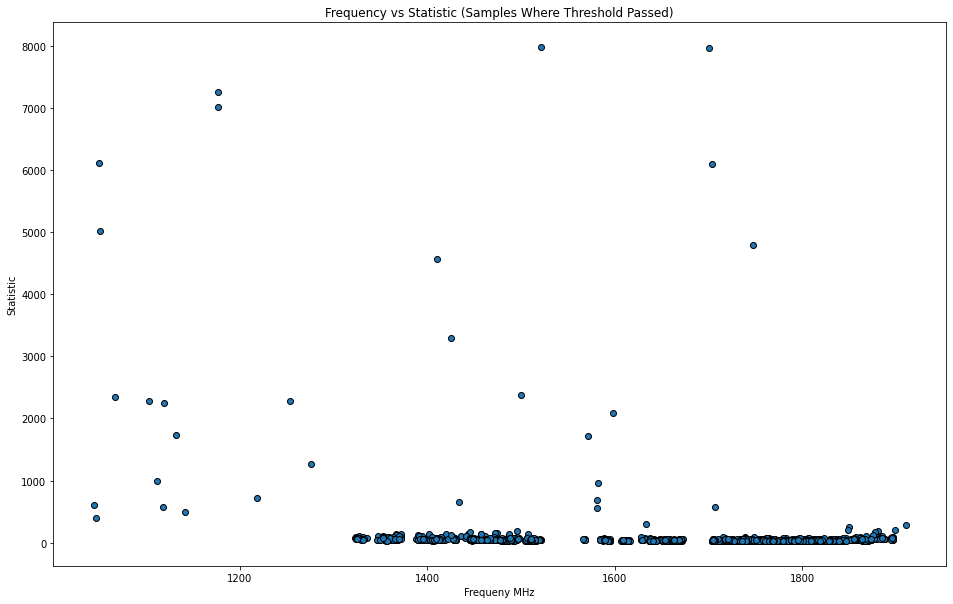

In [147]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000_hits["freqs"], y=sample_10000_hits["statistic"], edgecolors="black")
plt.title("Frequency vs Statistic (Samples Where Threshold Passed)")
plt.xlabel("Frequeny MHz")
plt.ylabel("Statistic")

Text(0, 0.5, 'Statistic')

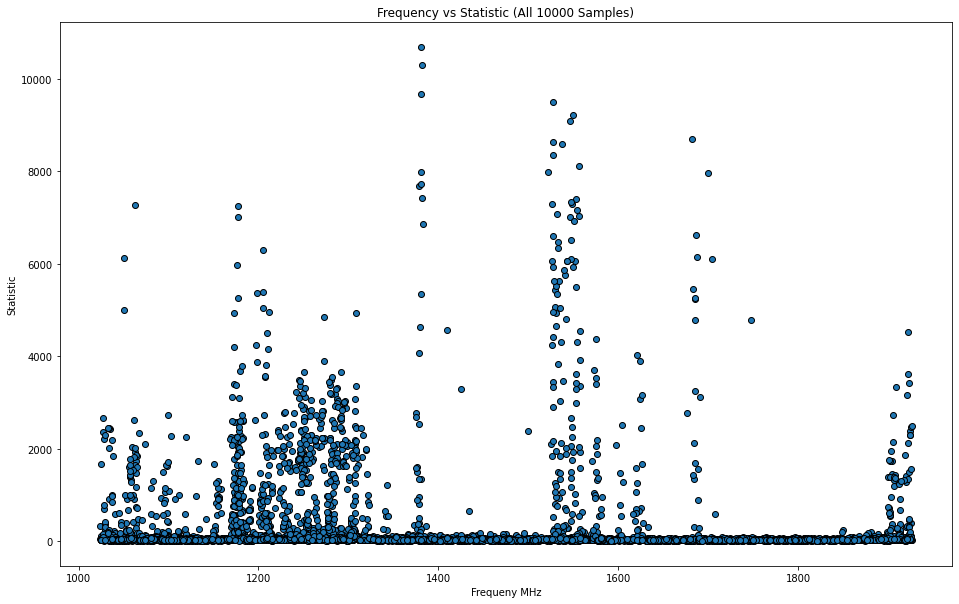

In [141]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000["freqs"], y=sample_10000["statistic"], edgecolors="black")
plt.title("Frequency vs Statistic (All 10000 Samples)")
plt.xlabel("Frequeny MHz")
plt.ylabel("Statistic")

Text(0, 0.5, 'Final Threshold Value')

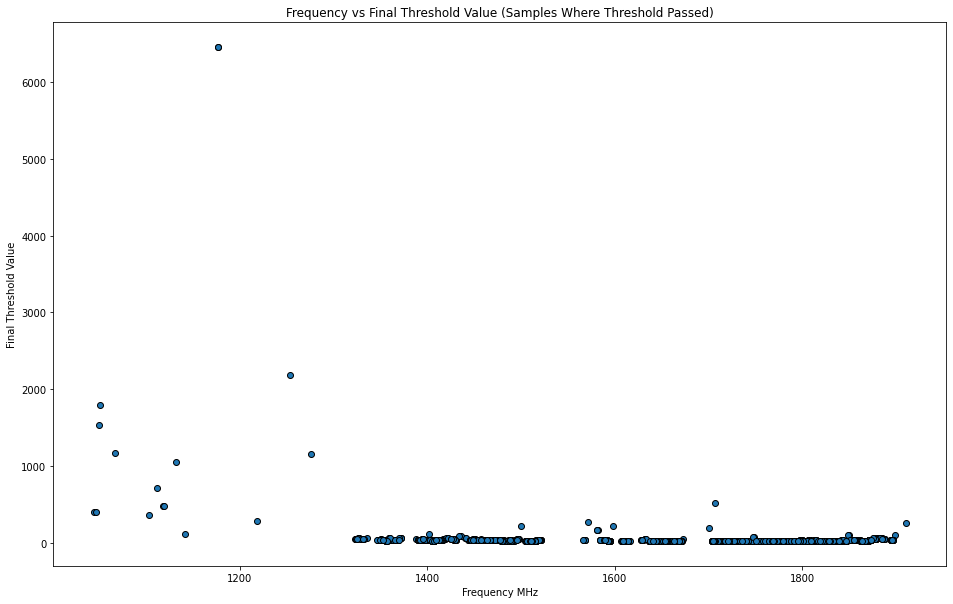

In [148]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_10000_hits["freqs"], y=sample_10000_hits["final_threshold"], edgecolors="black")
plt.title("Frequency vs Final Threshold Value (Samples Where Threshold Passed)")
plt.xlabel("Frequency MHz")
plt.ylabel("Final Threshold Value")

In [199]:
# only display samples that have final thresholds less than 50000
sample_below_50000 = sample_10000[sample_10000["final_threshold"] <= 50000]
sample_below_50000

,index,statistic,pvalue,freqs,coarse_channel,final_threshold
2149056,275112704,41.612942,9.201621e-10,1157.613516,262,6130.254174
1248235,159793536,8.292717,1.582193e-02,1479.811549,152,31.627390
2360474,302177536,10.917990,4.257832e-03,1081.995249,288,4902.999385
401136,51351552,70.818131,4.188305e-16,1782.794952,48,25.965499
143774,18405248,60.620772,6.860671e-14,1874.845862,17,66.533045
...,...,...,...,...,...,...
680518,87116928,1421.910809,1.721833e-309,1682.867646,83,16605.977667
1968136,251952128,40.944623,1.285251e-09,1222.323418,240,32630.372429
2093416,267989888,200.137955,3.472124e-44,1177.514434,255,6454.158495
2303940,294940288,18.354165,1.033817e-04,1102.215886,281,370.261719


Text(0, 0.5, 'Final Threshold Value')

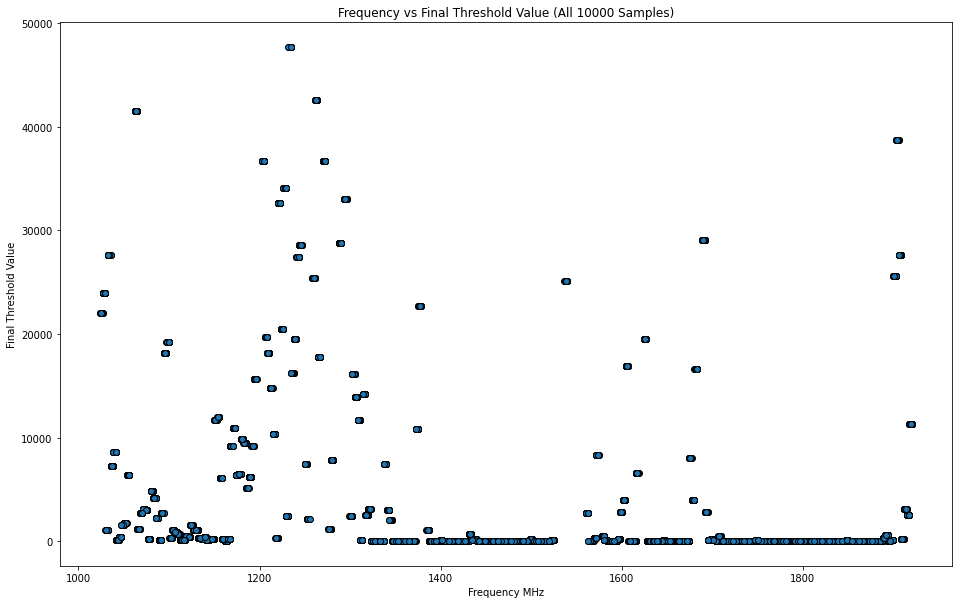

In [200]:
plt.figure(figsize=(16,10))

plt.scatter(x=sample_below_50000["freqs"], y=sample_below_50000["final_threshold"], edgecolors="black")
plt.title("Frequency vs Final Threshold Value (All 10000 Samples)")
plt.xlabel("Frequency MHz")
plt.ylabel("Final Threshold Value")